In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ridge_logistic as r

from algorithms.gradient_descent import *
from algorithms.nesterov_gradient_descent import *
from algorithms.newton import *
from algorithms.sub_sampled_newton import *
from algorithms.nesterov_sub_sampled_newton import *

from sklearn import preprocessing

In [2]:
df_A = pd.read_csv('datasets/GISETTE/gisette_train.data', delim_whitespace=True, header=None)
df_b = pd.read_csv('datasets/GISETTE/gisette_train.labels', header=None)

In [3]:
df_A.var()

0        81138.548737
1         8362.894815
2       116799.530880
3          664.189631
4        11933.067060
            ...      
4995     34326.155779
4996    155998.183977
4997     11447.805274
4998     86581.540071
4999    106673.862481
Length: 5000, dtype: float64

In [4]:
df_A

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,550,0,495,0,0,0,0,976,0,0,...,0,0,0,991,991,0,0,0,0,983
1,0,0,0,0,0,0,0,976,0,0,...,0,475,0,991,0,0,991,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,742,0,0,0,0,684,0,956,...,0,0,0,0,0,0,674,0,0,838
4,0,0,0,0,0,0,0,608,0,979,...,991,0,0,828,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,0,0,0,0,0,0,0,0,...,991,0,0,0,0,0,783,0,0,0
5996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,921,0,886,0
5997,0,0,0,0,0,758,0,0,0,522,...,0,901,0,0,0,0,980,0,0,0
5998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,690,0,0,0,0,0


In [5]:
df_A_sampled = df_A.sample(n=250)
df_b_sampled = df_b.loc[df_A_sampled.index]

In [6]:
df_A_sampled = preprocessing.normalize(df_A_sampled)

In [7]:
A = df_A_sampled
b = df_b_sampled.to_numpy().flatten()
n, d = A.shape

In [8]:
A

array([[0.05171091, 0.        , 0.        , ..., 0.        , 0.        ,
        0.04257932],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.03107863, ..., 0.        , 0.        ,
        0.03107863],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.03619247, ..., 0.        , 0.        ,
        0.03837274]])

In [9]:
n, d = A.shape
rl = r.Ridge_Logistic_Regression(0.1)
st = 10 # stop time
ss = 900  # sampling size
lambd = 0.1
alpha = 0.1
w, t = newton(A, b, np.zeros(d), rl, 0.1, 15)
w_stars = w[len(t)-1]

Newton computation time: 15.344795942306519


In [10]:
w0, t0 = newton(A, b, np.zeros(d), rl, lambd, st)
w1, t1 = sub_sampled_newton_rnss(A, b, np.zeros(d), rl, lambd, st, ss)
w2, t2 = gd(A, b, np.zeros(d), rl, lambd, st, alpha)
w3, t3 = nesterov_gd(A, b, np.zeros(d), rl, lambd, st, alpha)
w4, t4 = nesterov_sub_sampled_newton_rnss(A, b, np.zeros(d), rl, lambd, st, ss)

Newton computation time: 10.81663203239441
Sub-sampled Newton rnss computation time: 10.697558879852295
GD computation time: 10.000688076019287
Nesterov GD computation time: 10.012957096099854


/Users/first/Documents/optimization/project/Approximate-Newton/ridge_logistic.py:12: RuntimeWarning: overflow encountered in exp
  return -A.T @ (b/(1 + np.exp(b * (A @ x))))
/Users/first/Documents/optimization/project/Approximate-Newton/ridge_logistic.py:18: RuntimeWarning: overflow encountered in exp
  return (1/(1 + np.exp(b * (A @ x)))) * (1/(1 + np.exp(-b * (A @ x))))
/Users/first/Documents/optimization/project/Approximate-Newton/algorithms/nesterov_sub_sampled_newton.py:14: RuntimeWarning: invalid value encountered in true_divide
  return Bi_norm_2/B_norm_2 # probability of selection for each i,...,n


Nesterov Sub-sampled Newton rnss computation time: 11.823410034179688


In [11]:
w_gaps0, w_gaps1, w_gaps2, w_gaps3, w_gaps4  = [], [], [], [], []

for k in range(len(t0)):
    w_gaps0.append(np.linalg.norm(w0[k] - w_stars)/np.linalg.norm(w_stars))
for k in range(len(t1)):
    w_gaps1.append(np.linalg.norm(w1[k] - w_stars)/np.linalg.norm(w_stars))
for k in range(len(t2)):
    w_gaps2.append(np.linalg.norm(w2[k] - w_stars)/np.linalg.norm(w_stars))
for k in range(len(t3)):
    w_gaps3.append(np.linalg.norm(w3[k] - w_stars)/np.linalg.norm(w_stars))
for k in range(len(t4)):
    w_gaps4.append(np.linalg.norm(w4[k] - w_stars)/np.linalg.norm(w_stars))

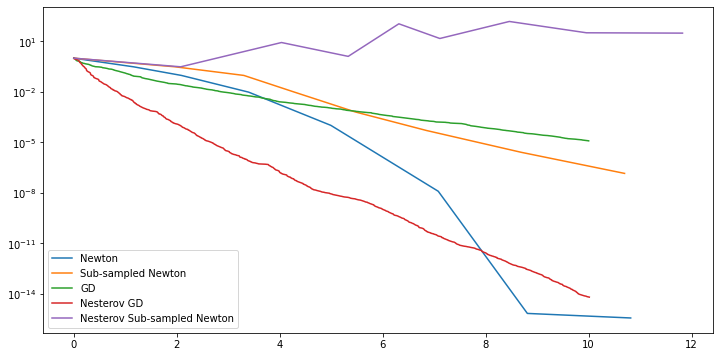

In [12]:
fig = plt.figure(figsize=(12, 6)) # set figure size
plt.yscale('log')
plt.plot(t0, w_gaps0, label='Newton') 
plt.plot(t1, w_gaps1, label='Sub-sampled Newton') 
plt.plot(t2, w_gaps2, label='GD') 
plt.plot(t3, w_gaps3, label='Nesterov GD') 
plt.plot(t4, w_gaps4, label='Nesterov Sub-sampled Newton') 
plt.legend()